<img src= "MSTS_Logo.png" style ="width:400px;height:400px"/>

# Data
So where and how do we get data?

Generally, there are three different ways you will access data with Python for our purposes:

1. Internally: you have direct access to a csv file from a directory
2. Data API: You are accessing some data API avaialble on the internet (e.g pandas datareader)
3. Exchange API: You are connecting to an exchange and grabbing data from there directly (e.g IBKR)

When working with data in python, the data will likely come in a few different formats. We will begin by introducing the Excel format (CSV, xlsx) as well as HTML files. We will then see that we can turn our imported data sets from APIs directly into dataframes.

## Excel & CSVs
In order to read a file, make sure it is in the same folder that you are currently working from.
For the purposes of example, we have provided a Tesla Stock data file in this repository which you can add to your working directory to access the CSV with the following code.

In [2]:
import pandas as pd

In [6]:
#We are assigning a pandas dataframe to variable df
df = pd.read_csv('Tesla_Stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Returns
0,2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,NaN
1,2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,0.046085
2,2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,-0.001057
3,2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,0.009967
4,2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,0.009912


In [5]:
#Creating a file
df.to_csv('The_Tesla_Stock.csv')
#Now look in the folder you were working from, that file will be there
#Use index=false if you dont want the old index

In [8]:
#When working with an excel file
pd.read_excel('Sample_Excel.xlsx', sheet_name='Sheet1')

,Unnamed: 0,A,B,C,D
0,0,1,1,1,1
1,1,2,2,2,2
2,2,3,3,3,3
3,3,4,4,4,4
4,4,5,5,5,5


## The Pandas DataReader
In order to analyze financial data, we will use the most important and well known libraries on the internet for this purpose, the pandas datareader API as well as googles stock API. The pandas-datareader is a spearate package that allows you to connect to Google's Stock API as well as others, grab data and read it into a dataframe. 

The link to the [pandas datareader](https://pandas-datareader.readthedocs.io/en/latest/)

Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame including:

* Yahoo! Finance
* Google Finance
* Enigma
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* OECD
* Eurostat
* Thrift Savings Plan
* Oanda currency historical rate
* Nasdaq Trader symbol definitions (remote_data.nasdaq_symbols)

It should be noted, that various sources support different kinds of data, so not all sources implement the same methods and the data elements returned might also differ.

## Alpha Vantage
Alpha Vantage is one API among any others. You can find documentation related to the API thorugh the pandas data reader website. To access the API you will need a key, known as an API key. You can procure yourself a key and input it as input to the parameter "api_key". [Find your API Key](https://www.alphavantage.co/)

In [7]:
#Gather imports
import os
from datetime import datetime
import pandas_datareader.data as web

facebook = web.DataReader("FB", "av-daily", 
                   start=datetime(2018, 2, 9), 
                   end = datetime(2021,3,9),
                   api_key='INSERT_API_KEY_HERE')

In [8]:
#This will onyl work if you have created and inserted an API key above
#Do it, its super quick :)
facebook.head()

,open,high,low,close,volume
2018-02-09,174.76,176.900,167.1800,176.11,37214470
2018-02-12,177.06,177.545,171.8400,176.41,31697374
2018-02-13,175.62,175.970,173.1000,173.15,20880702
2018-02-14,173.45,179.810,173.2119,179.52,27963758
2018-02-15,180.50,180.500,176.8400,179.96,20554092


### Other sources
AlphaVantage has plenty of data avaialble. If you want to explore other datasets, maybe for more macro related research, look for the Fed's API. 

## Data Reader
One can use the datareader directly and obtain data from the diffrent sources listed above

In [9]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 1, 1)
gdp = web.DataReader("GDP", "fred", start, end)

In [10]:
#Twenty years of data, two clicks
gdp.head()

,GDP
DATE,
2000-01-01,10002.179
2000-04-01,10247.720
2000-07-01,10318.165
2000-10-01,10435.744
2001-01-01,10470.231


## Quandl 
Quandl is a company that gathers various typed of financial datasets. Alot of their data requires paid membership, but alot of it is free too.

https://www.quandl.com/tools/python

First you will need to get quandl on your computer. Do this by pip installing quandl.

`pip install quandl`

Next, access the quandl website using [this link](https://www.quandl.com/data/NASDAQOMX/NQUSB-NASDAQ-US-Benchmark-Index-NQUSB). I have led you specifically to the data set I will be using, but please explore the website for yourself and find any data you would like to use, there is plenty on there.

Once you have found your dataset, make sure to click on Python next to libraries on the quandl website to get the exact command you will need to import the dataset.

In [11]:
import quandl
import matplotlib.pyplot as plt

In [12]:
#We will be using NASDAQ index
nasdaq = quandl.get("NASDAQOMX/NQUSB", authtoken="NCw1QH8fycdkQE33zC3b", start_date="2010-01-01", end_date="2021-07-01")

In [13]:
nasdaq.head()

,Index Value,High,Low,Total Market Value,Dividend Market Value
Trade Date,,,,,
2011-05-16,992.73,1004.03,991.42,1.497199e+13,9.273099e+08
2011-05-17,991.47,993.01,984.02,1.495300e+13,3.330181e+09
2011-05-18,1001.30,1002.04,990.20,1.510129e+13,2.475359e+09
2011-05-19,1003.45,1006.14,997.77,1.513367e+13,1.109318e+09
2011-05-20,996.00,1002.16,993.42,1.502122e+13,1.242103e+08


Text(0.5, 1.0, 'NASDAQ Historical Value')

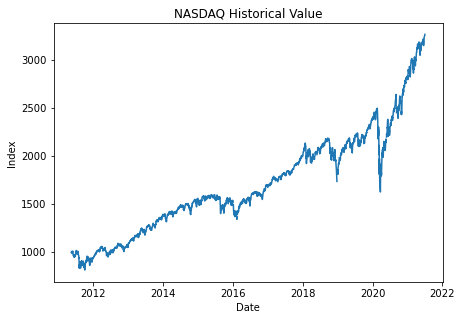

In [14]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.9, 0.9]) # left, bottom, width, height (range 0 to 1)

axes.plot(nasdaq.index ,nasdaq['Index Value'])
axes.set_xlabel('Date') # Notice the use of set_ to begin methods
axes.set_ylabel('Index')
axes.set_title('NASDAQ Historical Value')

In [15]:
#Get data for any stock using get, wiki and the stock ticker
AAPL = quandl.get("WIKI/AAPL")

In [16]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [17]:
#Grab a single column
AAPL = quandl.get("WIKI/AAPL.1")
AAPL.head()

,Open
Date,
1980-12-12,28.75
1980-12-15,27.38
1980-12-16,25.37
1980-12-17,25.87
1980-12-18,26.63


### Note on data
As you can see, its pretty much easy as ever to obtain these datasets. Professional firms have increasingly stopped looking to find edge in basic datasets. You can bet your bottom dollar that any strategy you will learn about in school, any indicator you know about, has most likely been tested on these datasets. All this to say, these datasets dont really have any edge left in them. You can do plenty of really cool things with them, but in the context of trading, it is likely you will need a more original approach than a basic strategy on an edgeless data set to make big money.

### See you in the next one!

### - Your MSTS Team